In [ ]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np

np.random.seed(42)

In [ ]:
TRAIN = True
# Number of epochs to train for.
EPOCHS = 25

In [ ]:
def set_res_dir():
    # Directory to store results
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR

In [ ]:
def monitor_tensorboard():
    %load_ext tensorboard
    %tensorboard --logdir runs/train

In [ ]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15967, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 15967 (delta 44), reused 56 (delta 29), pack-reused 15880
Receiving objects: 100% (15967/15967), 14.70 MiB | 25.65 MiB/s, done.
Resolving deltas: 100% (10943/10943), done.


In [ ]:
%cd yolov5/
!pwd

/content/yolov5
/content/yolov5


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.3/616.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
monitor_tensorboard()

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-08-30 09:49:24.586363: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 09:49:25.493891: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-30 09:49:28.371609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-30 09:49:28.460900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative 

In [ ]:
RES_DIR = set_res_dir()
if TRAIN:
    !python train.py --data "/content/drive/MyDrive/thermal dataset/data.yaml" --weights yolov5s.pt \
    --img 640 --epochs {EPOCHS} --batch-size 16 --name {RES_DIR}

Current number of result directories: 0
results_1
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/thermal dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=results_1, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, ob

In [ ]:
!python /content/yolov5/detect.py --weights /content/thermal.pt --img-size 640 --conf 0.4 --source /content/girl.jpg --save-txt


detect: weights=['/content/thermal.pt'], source=/content/girl.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-217-g8c45e51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/girl.jpg: 640x640 1 mens, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 37.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


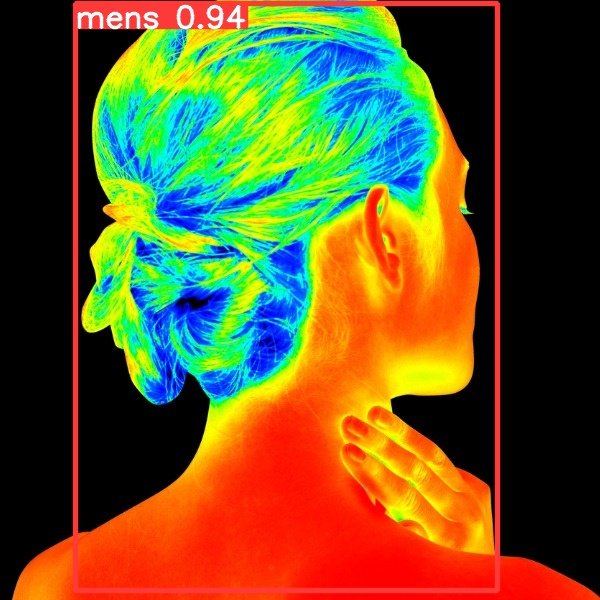

In [ ]:
from PIL import Image
# visualize prediction result
Image.open('/content/yolov5/runs/detect/exp/girl.jpg')

In [ ]:
!python /content/yolov5/detect.py --weights /content/thermal.pt --img-size 640 --conf 0.4 --source /content/man3.webp --save-txt

detect: weights=['/content/thermal.pt'], source=/content/man3.webp, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-217-g8c45e51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/man3.webp: 256x640 2 menss, 51.9ms
Speed: 0.4ms pre-process, 51.9ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2
1 labels saved to runs/detect/exp2/labels


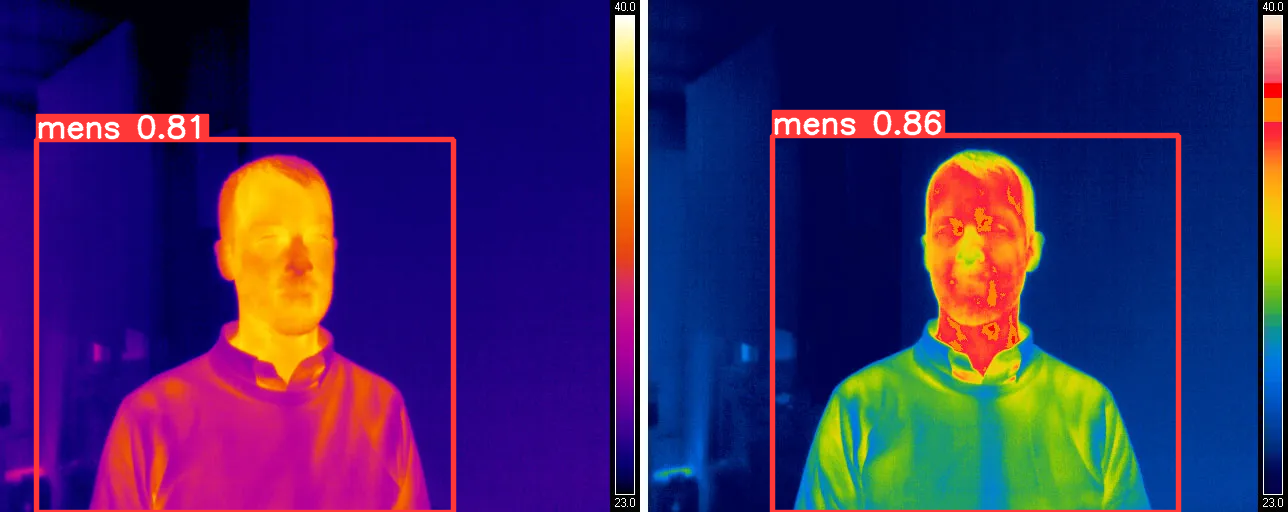

In [ ]:
from PIL import Image
# visualize prediction result
Image.open('/content/yolov5/runs/detect/exp2/man3.webp')

In [ ]:
!python /content/yolov5/detect.py --weights /content/thermal.pt --img-size 640 --conf 0.4 --source /content/man4.webp --save-txt

detect: weights=['/content/thermal.pt'], source=/content/man4.webp, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-217-g8c45e51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/man4.webp: 256x640 2 menss, 40.4ms
Speed: 0.4ms pre-process, 40.4ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4
1 labels saved to runs/detect/exp4/labels


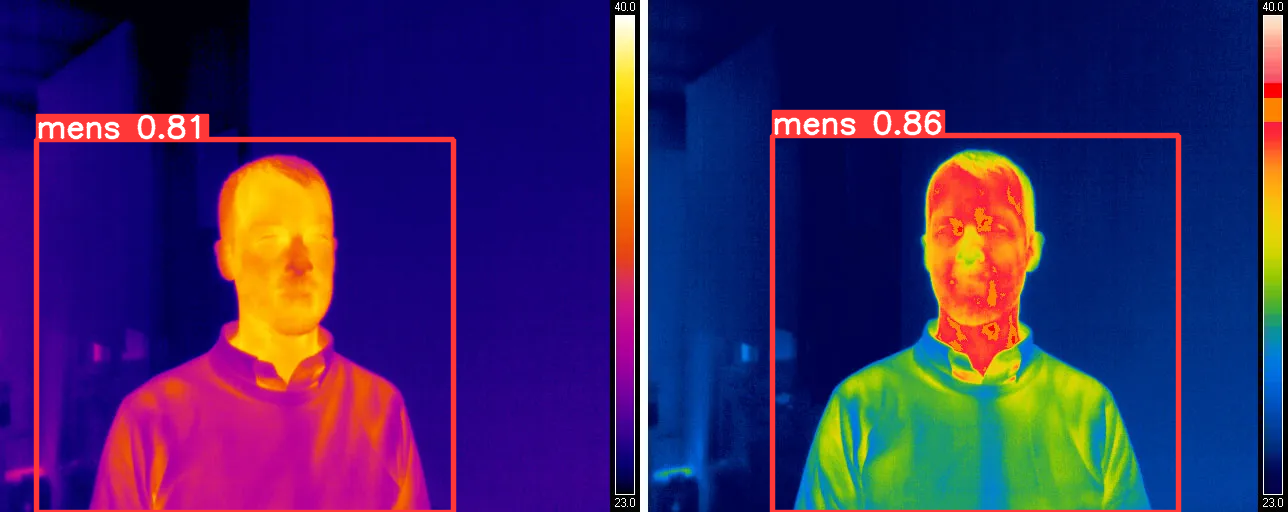

In [ ]:
from PIL import Image
# visualize prediction result
Image.open('/content/yolov5/runs/detect/exp4/man4.webp')

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/yolov5/runs/train/results_1/weights/best.pt --img-size 640 --conf 0.4 --source /content/drive/MyDrive/Man4.jpg --save-txt

detect: weights=['/content/yolov5/yolov5/runs/train/results_1/weights/best.pt'], source=/content/drive/MyDrive/Man4.jpg, data=../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Man4.jpg: 640x480 1 mens, 43.3ms
Speed: 0.6ms pre-process, 43.3ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../runs/detect/exp4
1 labels saved to ../runs/detect/exp4/labels


In [ ]:
from PIL import Image
# visualize prediction result
Image.open('/content/yolov5/runs/detect/exp2/man3.webp')